In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib.pyplot


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Visualisation du tableau de données brutes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('p2-arbres-fr.csv', sep= ';' )
data.head(5)

C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_29032\422591969.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


Etude des données : nombre de lignes & colonnes, types des données et statistiques

In [3]:
data.shape

(200137, 18)

In [4]:
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Cast en objet des colonnes sur lequel il n'est pas pertinent de faire des calculs

In [5]:
c=['id','numero','remarquable']
for i in c :
    data.loc[:,i]=data[i].astype(object)
data.dtypes

C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_29032\849979076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[99874 99875 99876 ... 2024743 2024744 2024745]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:,i]=data[i].astype(object)
C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_29032\849979076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[:,i]=data[i].astype(object)
C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_29032\849979076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0 nan nan ... 0.0 0.0 0.0]' has dtype incompatible with float64, please explicitly cast to

id                      object
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                  object
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable             object
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Recherche de duplicatas selon les identifiants des arbres

In [6]:
data.duplicated('id').sum()


0

Recherche de valeurs incohérentes dans les variables entières ou flottantes

In [7]:
data.describe()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,48.854491,2.348208
std,673.190213,1971.217387,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307530
50%,70.000000,8.000000,48.854162,2.351095
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


Valeurs maximales et minimales aberrantes.
Après recherche:
Arbre le plus grand de France : 67,77 m / Arbre avec la plus grande circonférence de France :  13,23 m.
Donc on passe toutes les valeurs aberrantes en NaN :
-circonférence < 0 ou > 14
-hauteur < 0 ou > 68

In [8]:
data.sort_values('circonference_cm').head(10)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856
24916,129081,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN / 2 RUE DE LA MONTAGNE DE L...,301007,Sophora,Sophora,japonica,NaN,0,0,NaN,0.0,48.841064,2.276902
24915,129080,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN / 2 RUE DE LA MONTAGNE DE L...,301005,Sophora,Sophora,japonica,NaN,0,0,NaN,0.0,48.841105,2.276797
24914,129079,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN / 2 RUE DE LA MONTAGNE DE L...,301003,Sophora,Sophora,japonica,NaN,0,0,NaN,0.0,48.841148,2.276698
24913,129078,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN / 2 RUE DE LA MONTAGNE DE L...,301001,Arbre à caramel,Cercidiphyllum,japonicum,Magnificum Nakai',0,0,NaN,0.0,48.841190,2.276597
24912,129077,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN,30146,Erable,Acer,palmatum,Atropurpureum',0,0,NaN,NaN,48.841183,2.276544
24911,129074,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN,30143,Cerisier à fleurs,Prunus,x subhirtella,Autumnalis',0,0,NaN,NaN,48.841149,2.276555
24910,129071,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN,30140,Cerisier à fleurs,Prunus,x subhirtella,Autumnalis',0,0,NaN,NaN,48.840941,2.277074
24909,129070,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN,30139,Cerisier à fleurs,Prunus,x subhirtella,Autumnalis',0,0,NaN,NaN,48.840921,2.277130
24908,129067,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC ANDRE CITROEN,30136,Sophora,Sophora,japonica,NaN,0,0,NaN,NaN,48.840742,2.277476


In [9]:
data.loc[(data['circonference_cm']==0) |(data['circonference_cm']>1400), 'circonference_cm']= np.nan
data.loc[(data['hauteur_m']==0) |(data['hauteur_m']>68), 'hauteur_m']= np.nan

df=data.iloc[:,[12,13]]
df.describe()

,circonference_cm,hauteur_m
count,174235.000000,160569.000000
mean,91.718421,10.400140
std,61.197516,5.321226
min,1.000000,1.000000
25%,45.000000,6.000000
50%,80.000000,10.000000
75%,122.500000,14.000000
max,1360.000000,68.000000


In [10]:
data.dtypes

id                      object
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                  object
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm       float64
hauteur_m              float64
stade_developpement     object
remarquable             object
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Les variables circonférence et hauteur sont devenues des flottants.
Maintenant que les valeurs aberrantes ont été prises en charge, on s'intéresse aux valeurs manquantes

In [11]:
data.isna().mean()


id                     0.000000
type_emplacement       0.000000
domanialite            0.000005
arrondissement         0.000000
complement_addresse    0.845596
numero                 1.000000
lieu                   0.000000
id_emplacement         0.000000
libelle_francais       0.007480
genre                  0.000080
espece                 0.008754
variete                0.816241
circonference_cm       0.129421
hauteur_m              0.197705
stade_developpement    0.335795
remarquable            0.315274
geo_point_2d_a         0.000000
geo_point_2d_b         0.000000
dtype: float64

In [12]:
data.describe(include='all')

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.0,200137,200136,200137,30902,0,200137,200137,198640,200121,198385,36777,174235.000000,160569.000000,132932,137039.0,200137.000000,200137.000000
unique,200137.0,1,9,25,3795,0,6921,69040,192,175,539,436,NaN,NaN,4,2.0,NaN,NaN
top,99874.0,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,0.0,NaN,NaN
freq,1.0,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,136855.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.718421,10.400140,NaN,NaN,48.854491,2.348208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.197516,5.321226,NaN,NaN,0.030234,0.051220
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,48.742290,2.210241
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,6.000000,NaN,NaN,48.835021,2.307530
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,10.000000,NaN,NaN,48.854162,2.351095
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.500000,14.000000,NaN,NaN,48.876447,2.386838


Le type d'emplacement a une unique valeur et n'a donc aucun intérêt pour l'analyse.
Le complément d'adresse et le numéro ont un pourcentage de valeurs manquantes très important et ne seront donc pas pertinents à étudier.

Les variables domanialité, arrondissement, stade de développement et remarquable ont le moins de cas unique et pourront donc être intéressantes à utiliser pour les regroupements.

On trace les histogrammes et boites à moustaches pour les variables numériques : circonférence, hauteur et les deux points de géolocalisation.

Text(0.5, 0, "Longitude de l'arbre")

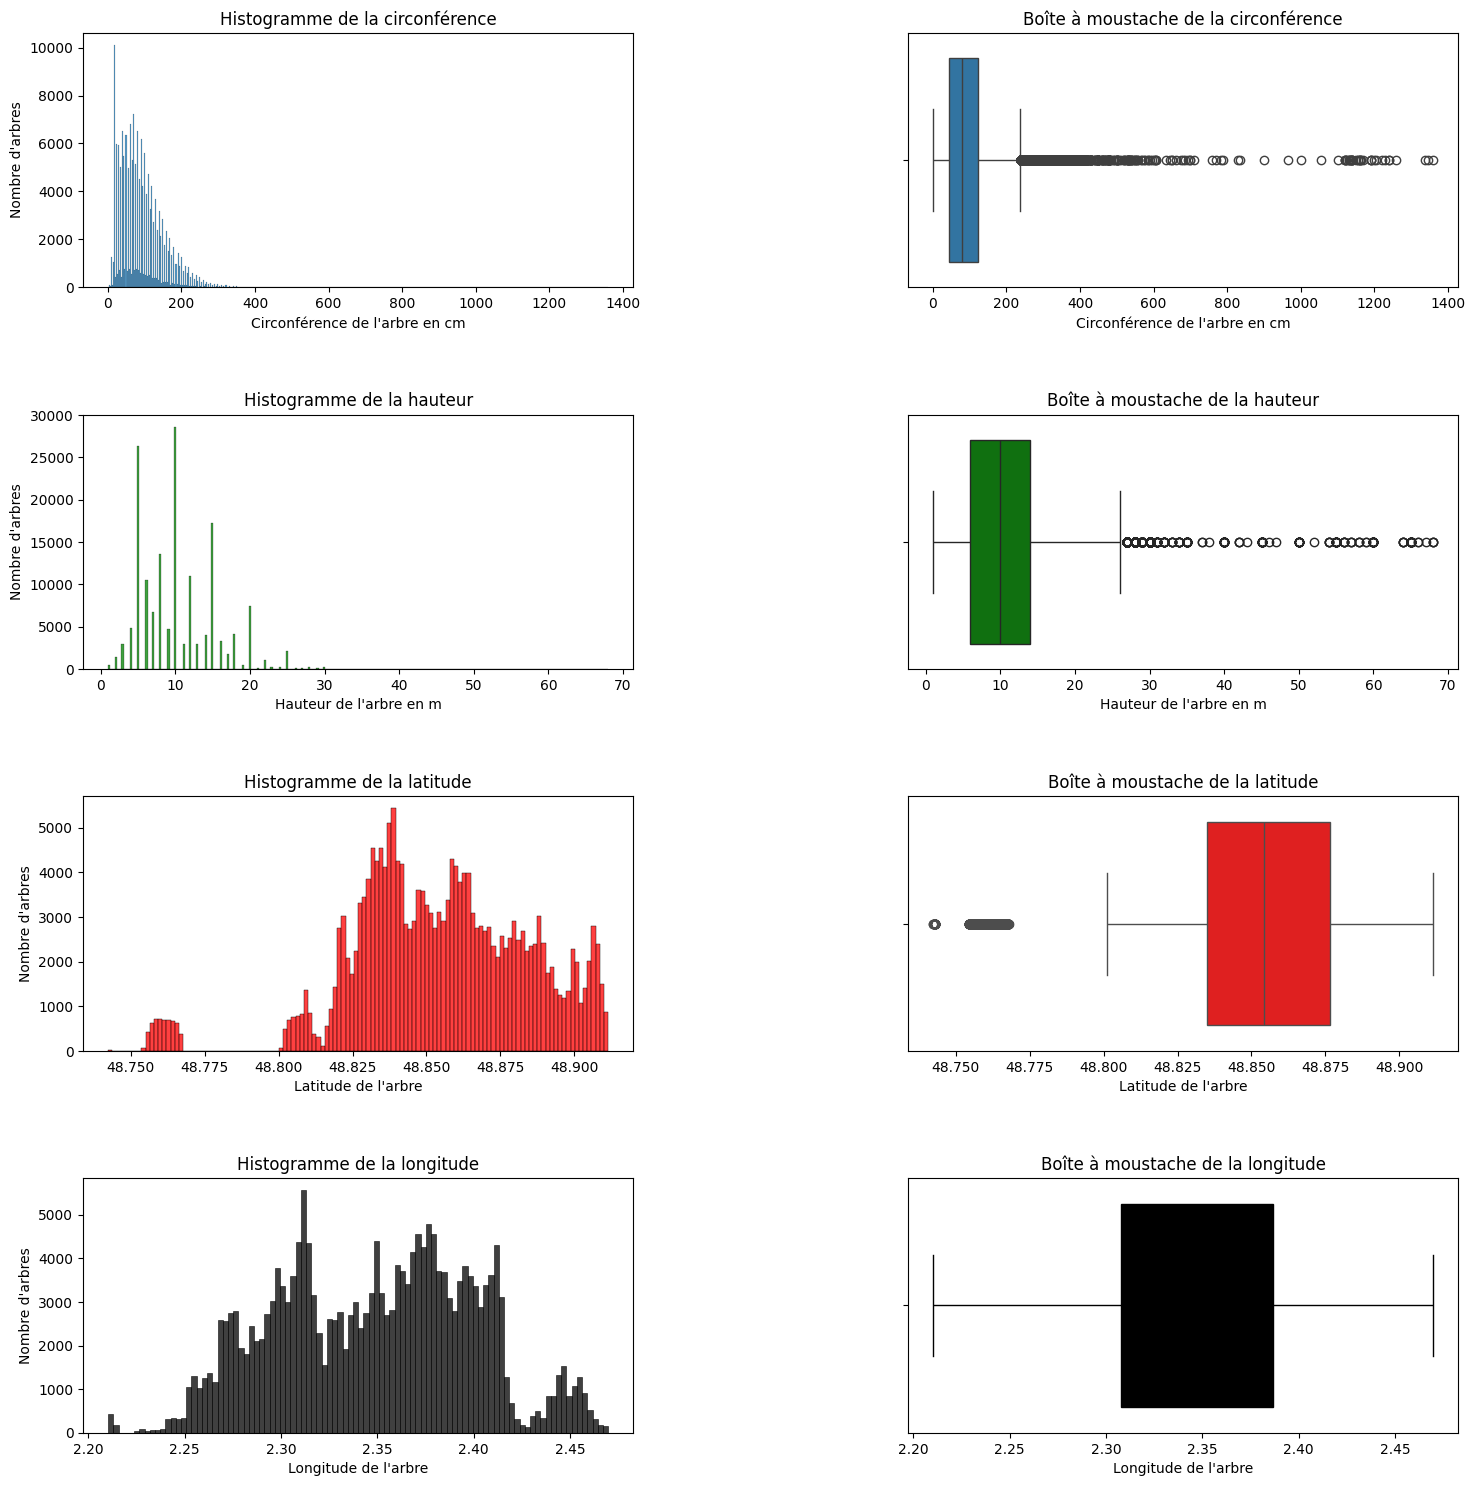

In [13]:
plt.figure(1,figsize=(10,20))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,top = 0.9, wspace = 0.5, hspace = 0.5)

plt.subplot(4,2,1)
sns.histplot(data=data,x='circonference_cm')
plt.title('Histogramme de la circonférence')
plt.xlabel("Circonférence de l'arbre en cm") 
plt.ylabel("Nombre d'arbres") 

plt.subplot(4,2,2)
sns.boxplot(data=data,x='circonference_cm')
plt.title('Boîte à moustache de la circonférence')
plt.xlabel("Circonférence de l'arbre en cm") 

plt.subplot(4,2,3)
sns.histplot(data=data,x='hauteur_m', color='green')
plt.title('Histogramme de la hauteur')
plt.xlabel("Hauteur de l'arbre en m") 
plt.ylabel("Nombre d'arbres")

plt.subplot(4,2,4)
sns.boxplot(data=data,x='hauteur_m', color='green')
plt.title('Boîte à moustache de la hauteur')
plt.xlabel("Hauteur de l'arbre en m") 

plt.subplot(4,2,5)
sns.histplot(data=data,x='geo_point_2d_a', color='red')
plt.title('Histogramme de la latitude')
plt.xlabel("Latitude de l'arbre") 
plt.ylabel("Nombre d'arbres")

plt.subplot(4,2,6)
sns.boxplot(data=data,x='geo_point_2d_a', color='red')
plt.title('Boîte à moustache de la latitude')
plt.xlabel("Latitude de l'arbre") 

plt.subplot(4,2,7)
sns.histplot(data=data,x='geo_point_2d_b', color='black')
plt.title('Histogramme de la longitude')
plt.xlabel("Longitude de l'arbre") 
plt.ylabel("Nombre d'arbres")

plt.subplot(4,2,8)
sns.boxplot(data=data,x='geo_point_2d_b', color='black')
plt.title('Boîte à moustache de la longitude')
plt.xlabel("Longitude de l'arbre") 

Pour la circonférence et la hauteur, on observe l'apparition de valeurs atypiques.  Une suppression de ces valeurs pourraient être cohérentes pour la suite de l'analyse via la méthode de la distance interquartile.
Pour la latitude et la longitude, aucune valeur atypique n'apparait. Celles visible sur la boite à moustache de la latitude s'expliquent par la séparation en deux pics distincts de la distribution de la latitude visible sur l'histogramme.

In [26]:
q1_c=data["circonference_cm"].quantile(q=0.25)
q3_c=data["circonference_cm"].quantile(q=0.75)
q1_h=data["hauteur_m"].quantile(q=0.25)
q3_h=data["hauteur_m"].quantile(q=0.75)

IQR_c=q3_c-q1_c
IQR_h=q3_h-q1_h

borne_inf_c = q1_c-1.5*IQR_c
borne_sup_c = q3_c +1.5*IQR_c
borne_inf_h = q1_h-1.5*IQR_h
borne_sup_h = q3_h +1.5*IQR_h

print (borne_inf_c,borne_sup_c, borne_inf_h, borne_sup_h)
data_net= data[((data["circonference_cm"]<borne_sup_c) & (data["circonference_cm"]>borne_inf_c)) & ((data["hauteur_m"]<borne_sup_h) & (data["hauteur_m"]>borne_inf_h)) ]
data_net.describe()

-71.25 238.75 -6.0 26.0


,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,155960.000000,155960.000000,155960.000000,155960.000000
mean,87.781393,10.071852,48.856026,2.345935
std,50.839001,4.793475,0.025714,0.049362
min,1.000000,1.000000,48.742290,2.210416
25%,47.000000,6.000000,48.836986,2.307290
50%,80.000000,10.000000,48.855267,2.348473
75%,120.000000,14.000000,48.874241,2.383197
max,238.000000,25.000000,48.911485,2.469759


Avec la méthode de la distance interquartile, on exclut les arbres contenant des valeurs atypiques pour la circonférence et la hauteur qui peuvent biaiser l'analyse.

On met maintenant en relation la hauteur et la circonférence pour voir si un lien existe entre ces deux variables.

Text(0, 0.5, "Hauteur de l'arbre")

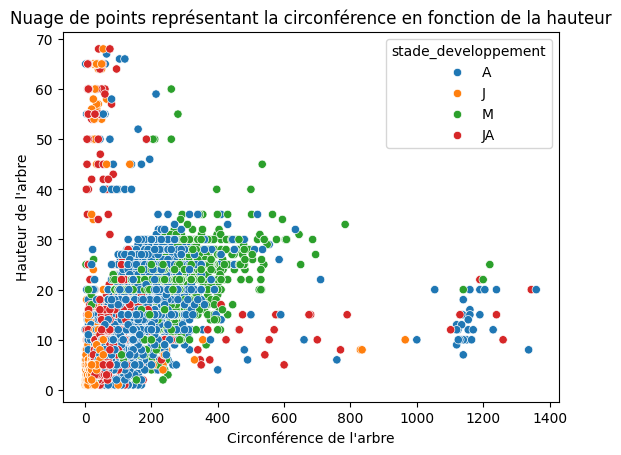

In [31]:
sns.scatterplot(data=data,x='circonference_cm', y='hauteur_m',hue ='stade_developpement')
plt.title('Nuage de points représentant la circonférence en fonction de la hauteur')
plt.xlabel("Circonférence de l'arbre") 
plt.ylabel("Hauteur de l'arbre")

Une corrélation linéaire semble exister mais on retrouve des exceptions. Les arbres jeunes et jeunes adultes ont plus fréquemment une circonférence faible mais peuvent avoir une hauteur importante. Nous pourrions essayer de voir si cela correspond à des types d'arbres particuliers mais il existe trop de genre différents dans cette base.

On regarde maintenant la proportion d'arbres selon leur stade de développement.

Text(0.5, 1.0, "Proportion d'arbres selon leur stade de développement")

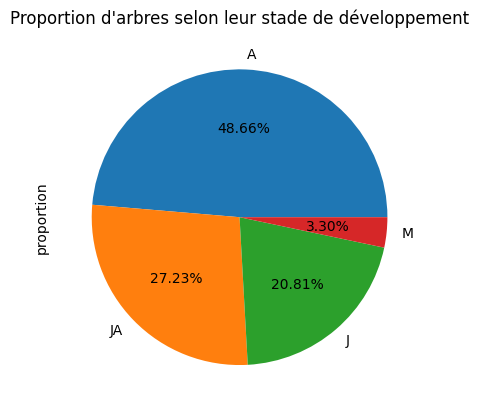

In [48]:

data_net['stade_developpement'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.title("Proportion d'arbres selon leur stade de développement")
